In [6]:
!pip install tensorflow.keras

/Users/ilonadyurova/Workout-Technique-Assessment/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Loaded 10 exercises from ../feature_vectors/feature_vectors.pkl
  • jumping_jacks_down        → (189, 20)
  • jumping_jacks_up          → (181, 20)
  • pullups_down              → (154, 20)
  • pullups_up                → (135, 20)
  • pushups_down              → (102, 20)
  • pushups_up                → (144, 20)
  • situp_down                → (102, 20)
  • situp_up                  → (99, 20)
  • squats_down               → (127, 20)
  • squats_up                 → (139, 20)

Combined feature matrix: (1372, 20)
Normalized data shape: (1372, 20)
Scaler saved to '../models/feature_scaler.pkl'
Training samples: 1097, Validation samples: 275


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,188 (31.98 KB)

 Trainable params: 8,188 (31.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8832 - val_loss: 0.9391
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7720 - val_loss: 0.6609
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4496 - val_loss: 0.4073
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3131 - val_loss: 0.3210
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2812 - val_loss: 0.2855
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2273 - val_loss: 0.2703
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2123 - val_loss: 0.2593
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2167 - val_loss: 0.2551
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2112 - val_loss: 0.2452
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2053 - val_loss: 0.2369
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1971 - val_loss: 0.2267
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1

Autoencoder saved to '../models/autoencoder_model.h5'


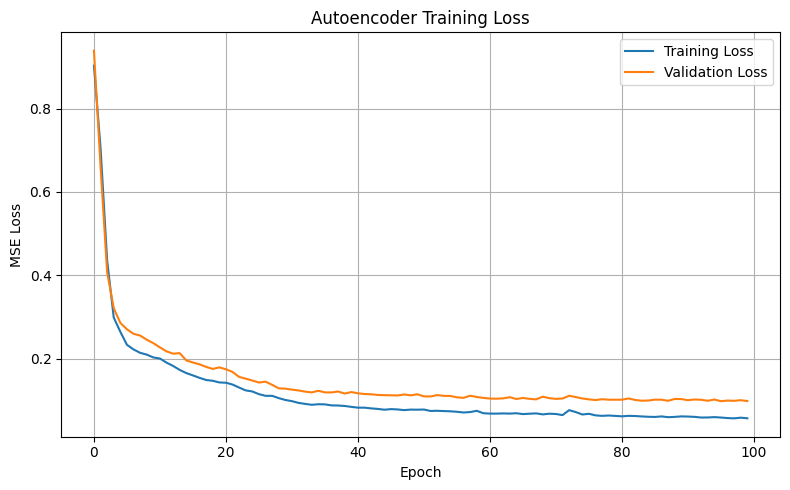

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Suggested anomaly threshold: 0.3872


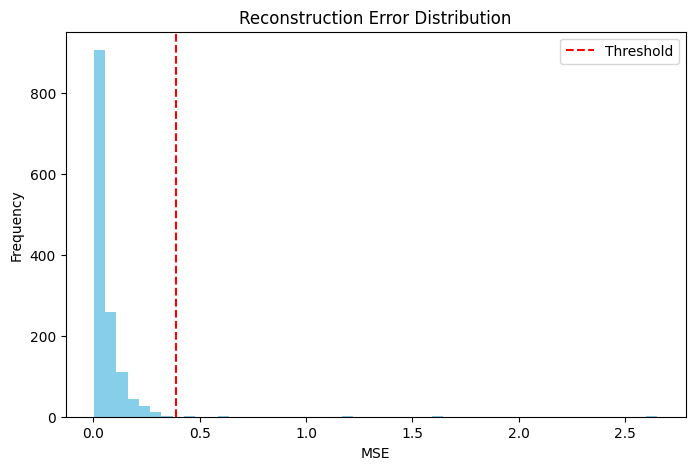

Reconstruction errors saved to 'reconstruction_errors.npy'


In [7]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

# 2. Load real feature vectors
# Path to your teammate's saved file
FEATURE_PATH = "../feature_vectors/feature_vectors.pkl"

if not os.path.exists(FEATURE_PATH):
    raise FileNotFoundError(f"File not found: {FEATURE_PATH}")

with open(FEATURE_PATH, "rb") as f:
    exercise_features = pickle.load(f)

print(f"Loaded {len(exercise_features)} exercises from {FEATURE_PATH}")
for name, feats in exercise_features.items():
    print(f"  • {name:25s} → {feats.shape}")

# 3. Combine all exercises for training

# Each exercise (key) contains multiple vectors (rows = samples, columns = features)
# We assume all are "correct" examples for autoencoder training
all_vectors = np.vstack(list(exercise_features.values()))
print(f"\nCombined feature matrix: {all_vectors.shape}")

# 4. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_vectors)
print(f"Normalized data shape: {X_scaled.shape}")

# Optionally, save the scaler for future inference use
import joblib
os.makedirs("../models", exist_ok=True)
joblib.dump(scaler, "../models/feature_scaler.pkl")
print("Scaler saved to '../models/feature_scaler.pkl'")

# 5. Split data for training/validation
X_train, X_val = train_test_split(X_scaled, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

# 6. Define Autoencoder architecture
input_dim = X_train.shape[1]

def build_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    
    # Encoder
    encoded = layers.Dense(64, activation='relu',
                           activity_regularizer=regularizers.l2(1e-5))(input_layer)
    encoded = layers.Dense(32, activation='relu')(encoded)
    encoded = layers.Dense(16, activation='relu')(encoded)
    
    # Bottleneck
    bottleneck = layers.Dense(8, activation='relu')(encoded)
    
    # Decoder
    decoded = layers.Dense(16, activation='relu')(bottleneck)
    decoded = layers.Dense(32, activation='relu')(decoded)
    decoded = layers.Dense(64, activation='relu')(decoded)
    output_layer = layers.Dense(input_dim, activation='linear')(decoded)
    
    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

autoencoder = build_autoencoder(input_dim)
autoencoder.summary()

# 7. Train Autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, X_val),
    shuffle=True,
    verbose=1
)

# 8. Save trained model
os.makedirs("../models", exist_ok=True)
autoencoder.save("../models/autoencoder_model.h5")
print("Autoencoder saved to '../models/autoencoder_model.h5'")

# 9. Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Compute reconstruction errors (optional visualization)
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)
print(f"\nSuggested anomaly threshold: {threshold:.4f}")

plt.figure(figsize=(8, 5))
plt.hist(reconstruction_errors, bins=50, color='skyblue')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 11. Save reconstruction errors (for analysis)
np.save("../feature_vectors/reconstruction_errors.npy", reconstruction_errors)
print("Reconstruction errors saved to 'reconstruction_errors.npy'")
